In [39]:
import pandas as pd
url = 'https://raw.githubusercontent.com/klaytoncastro/idp-machinelearning/main/decision-tree/winequality-merged.csv'
arquivo = pd.read_csv(url)
arquivo

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [40]:
arquivo['color'] = arquivo['color'].replace('red', 0)
arquivo['color'] = arquivo['color'].replace('white', 1)
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [41]:
import numpy as np
arquivo['worst'] = np.where(arquivo['quality'] < 7, 1, 0)
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,worst
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,1


In [42]:
#arquivo = arquivo.drop(['alcohol', 'free sulfur dioxide', 'total sulfur dioxide'], axis=1) # Teste removendo várias colunas com baixa correlação
arquivo = arquivo.drop(['quality'], axis=1) #Removendo a coluna 'quality' para não interferir nos cálculos do modelo para predição da variável dependente 'worst'

#arquivo.head()

In [43]:
# Exibir o percentual de cada classe
print(arquivo['worst'].value_counts(normalize=True) * 100)

worst
1    80.344775
0    19.655225
Name: proportion, dtype: float64


In [44]:
# Definindo os atributos da função de aprendizagem
y = arquivo['worst']
X = arquivo.drop('worst',axis = 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [45]:
corr=arquivo.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,worst
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.159212,-0.252700,0.299568,-0.027447,-0.486740,0.049447
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.030868,0.261454,0.225984,0.001800,-0.653036,0.151714
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.057748,-0.329808,0.056197,0.004532,0.187397,-0.054444
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.175741,-0.267320,-0.185927,0.001866,0.348821,0.063992
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.061628,0.044708,0.395593,0.000619,-0.512678,0.161781
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.029640,-0.145854,-0.188457,0.019802,0.471644,-0.014767
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.030990,-0.238413,-0.275727,0.022287,0.700357,0.051226
density,0.159212,0.030868,0.057748,0.175741,0.061628,0.029640,0.030990,1.000000,-0.052710,0.062810,-0.003839,-0.037252,0.025493
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,-0.052710,1.000000,0.192123,-0.000090,-0.329129,-0.028149
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.062810,0.192123,1.000000,-0.002452,-0.487218,-0.033971


<Axes: >

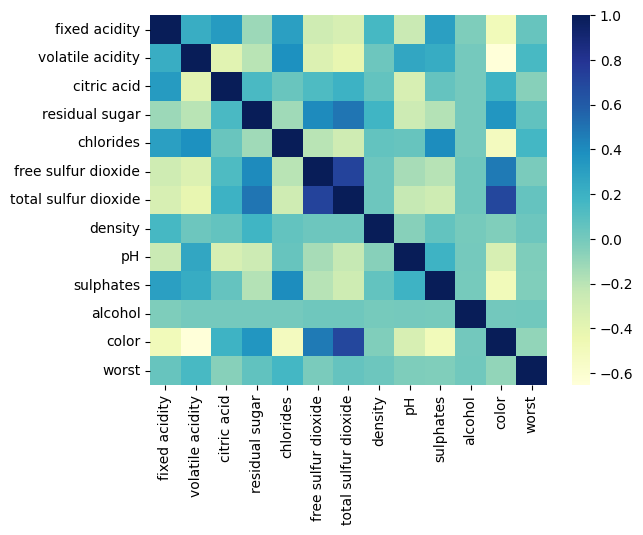

In [46]:
import seaborn as sns
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap="YlGnBu")


In [47]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [48]:
pca.explained_variance_ratio_.cumsum()

array([1., 1.])

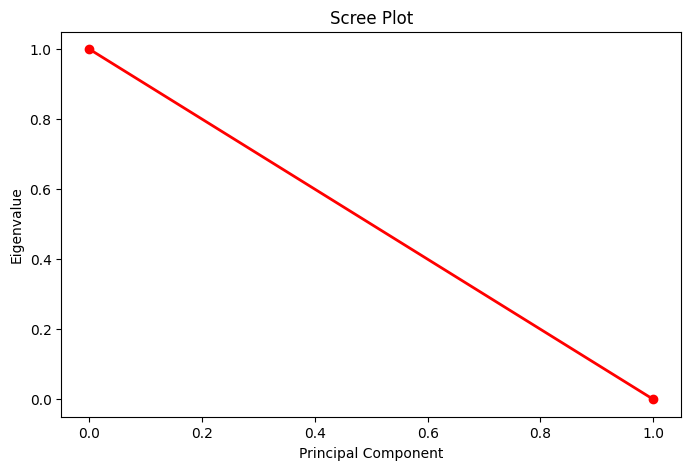

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))

plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

plt.show()

In [50]:
pca.transform(X)

array([[-1.30270381e+09,  5.67606868e+01],
       [-1.30270381e+09,  1.18951828e+01],
       [-1.30270381e+09, -1.82388232e+01],
       ...,
       [-1.30270381e+09, -7.40639581e+01],
       [-1.30270381e+09, -6.94935141e+01],
       [-1.30270381e+09, -7.45986397e+01]])

In [51]:
arquivo_x=arquivo.drop(['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','density','pH','sulphates','color'],axis =1)

<Axes: >

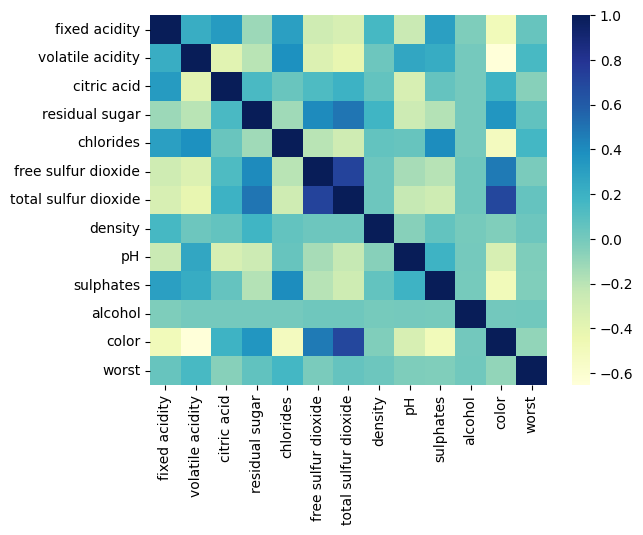

In [52]:
PCA1 = pca.transform(X)[:,0]
PCA2=  pca.transform(X)[:,1]
arquivo_x['pca1'] = PCA1
arquivo_x['pca2'] = PCA2
teste=arquivo.corr()
sns.heatmap(teste,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap="YlGnBu")


In [53]:
arquivo_x

,free sulfur dioxide,total sulfur dioxide,alcohol,worst,pca1,pca2
0,45.0,170.0,8.8,1,-1.302704e+09,56.760687
1,14.0,132.0,9.5,1,-1.302704e+09,11.895183
2,30.0,97.0,10.1,1,-1.302704e+09,-18.238823
3,47.0,186.0,9.9,1,-1.302704e+09,72.273936
4,47.0,186.0,9.9,1,-1.302704e+09,72.273936
...,...,...,...,...,...,...
6492,32.0,44.0,10.5,1,-1.302704e+09,-69.495534
6493,39.0,51.0,11.2,1,-1.302704e+09,-61.066839
6494,29.0,40.0,11.0,1,-1.302704e+09,-74.063958
6495,32.0,44.0,10.2,1,-1.302704e+09,-69.493514


In [54]:
#arquivo_x=arquivo.drop(['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','density','pH','sulphates','color'],axis =1)

In [55]:
arquivo_x

,free sulfur dioxide,total sulfur dioxide,alcohol,worst,pca1,pca2
0,45.0,170.0,8.8,1,-1.302704e+09,56.760687
1,14.0,132.0,9.5,1,-1.302704e+09,11.895183
2,30.0,97.0,10.1,1,-1.302704e+09,-18.238823
3,47.0,186.0,9.9,1,-1.302704e+09,72.273936
4,47.0,186.0,9.9,1,-1.302704e+09,72.273936
...,...,...,...,...,...,...
6492,32.0,44.0,10.5,1,-1.302704e+09,-69.495534
6493,39.0,51.0,11.2,1,-1.302704e+09,-61.066839
6494,29.0,40.0,11.0,1,-1.302704e+09,-74.063958
6495,32.0,44.0,10.2,1,-1.302704e+09,-69.493514


In [56]:
y = arquivo['worst']
X = arquivo.drop('worst',axis = 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


<Axes: xlabel='volatile acidity', ylabel='worst'>

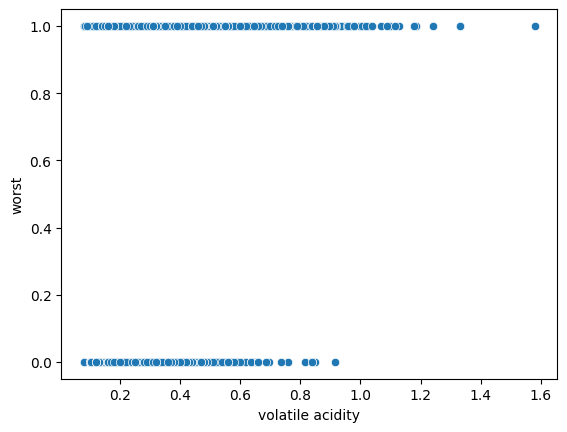

In [57]:
sns.scatterplot(data=arquivo,x='volatile acidity',y='worst')

In [90]:
from sklearn.model_selection import train_test_split

# Definindo os conjuntos de treino e teste, onde x é o conjunto de atributos (features que são nossas variáveis preditoras) e y é a variável alvo.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=55)

In [91]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(penalty='l2',solver='newton-cg') 
modelo.fit(x_train , y_train)

D:\Anaconda\lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\Anaconda\lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(solver='newton-cg')

In [92]:
#Realizando a Predição 
y_pred = modelo.predict(x_test)

#Verificação de Acurácia
resultado = modelo.score(x_test, y_test)
print ("Acurácia:", resultado)

Acurácia: 0.7951048951048951


In [93]:
from sklearn.metrics import confusion_matrix, classification_report

"""
Calculando e exibindo a matriz de confusão. A orientação padrão é a seguinte:
[0,0]: Verdadeiros Negativos (VN) - Previsões corretamente identificadas como negativas.
[0,1]: Falsos Positivos (FP) - Previsões incorretamente identificadas como positivas.
[1,0]: Falsos Negativos (FN) - Previsões incorretamente identificadas como negativas.
[1,1]: Verdadeiros Positivos (VP) - Previsões corretamente identificadas como positivas.
"""

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[   0  293]
 [   0 1137]]


In [94]:
"""
Calculando e exibindo as métricas de classificação.
Se algumas classes têm muito mais amostras do que outras, isso pode influenciar o desempenho e confiabilidade do modelo.

O "support" refere-se à quantidade de ocorrências da classe específica no conjunto de dados, sendo útil para verificar desbalanceamentos.
A "macro avg" calcula a média aritmética das métricas (precisão, recall, F1-score) para cada classe, sem considerar o número de instâncias em cada classe (support).
A "weighted avg" calcula a média ponderada das métricas para cada classe, considerando o número de instâncias em cada classe (support).
"""
print("Relatório de Classsificação:")
print(classification_report(y_test, y_pred, zero_division=0))

Relatório de Classsificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       293
           1       0.80      1.00      0.89      1137

    accuracy                           0.80      1430
   macro avg       0.40      0.50      0.44      1430
weighted avg       0.63      0.80      0.70      1430



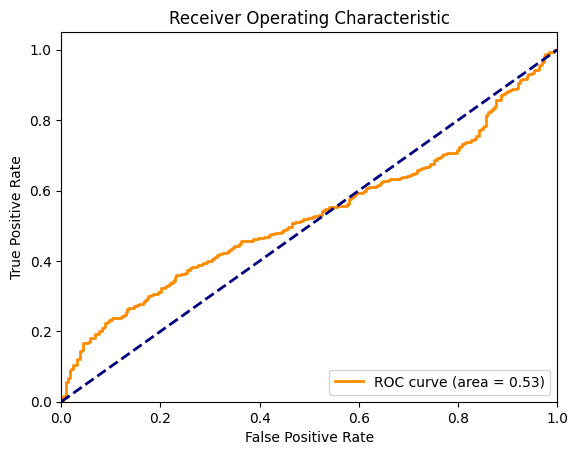

In [95]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prever as probabilidades para os dados de teste.
# Note que estamos interessados nas probabilidades da classe positiva (1), então usamos [:, 1].
y_probs = modelo.predict_proba(x_test)[:, 1]

# Calcular FPR, TPR, e limiares
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#
Grid Search

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    "logisticregression__penalty": ['none', 'l2'],
    "logisticregression__solver": ['lbfgs', 'newton-cg', 'sag', 'saga','newton-cholesky',],
    "logisticregression__max_iter": [1,30, 40, 100]}


In [109]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression())
])
# Configurando o GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Treinando o GridSearchCV
grid_search.fit(x_train, y_train)

# Melhores parâmetros e score
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor score de acurácia:", grid_search.best_score_)

Melhores Parâmetros: {'logisticregression__max_iter': 1, 'logisticregression__penalty': 'none', 'logisticregression__solver': 'sag'}
Melhor score de acurácia: 0.8065920158258224


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [110]:
# Obtendo os melhores parâmetros e a melhor pontuação
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Melhores Parâmetros: {best_params}")
print(f"Melhor Pontuação: {best_score}")

# Avaliando o modelo nos dados de teste
y_pred = grid_search.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy no conjunto de teste: {accuracy}")

# Exibindo o relatório de classificação
print(classification_report(y_test, y_pred))

# Exibindo os resultados do GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)
print(results.head())

Melhores Parâmetros: {'logisticregression__max_iter': 1, 'logisticregression__penalty': 'none', 'logisticregression__solver': 'sag'}
Melhor Pontuação: 0.8065920158258224
Accuracy no conjunto de teste: 0.7986013986013986
              precision    recall  f1-score   support

           0       0.67      0.03      0.06       293
           1       0.80      1.00      0.89      1137

    accuracy                           0.80      1430
   macro avg       0.73      0.51      0.48      1430
weighted avg       0.77      0.80      0.72      1430

   mean_fit_time  std_fit_time  mean_score_time  std_score_time   
0       0.006822      0.008355         0.001005        0.001268  \
1       0.018013      0.007169         0.002387        0.000481   
2       0.010372      0.000488         0.003191        0.000400   
3       0.010804      0.000422         0.002833        0.001473   
4       0.219450      0.003550         0.000000        0.000000   

  param_logisticregression__max_iter param_logisti

In [111]:
param_distributions = {
    "logisticregression__penalty": ['none', 'l2'],
    "logisticregression__solver": ['lbfgs', 'newton-cg', 'sag', 'saga','newton-cholesky'],
    "logisticregression__max_iter": randint(50, 500)
}

# Criando um pipeline que inclui a normalização dos dados e a regressão logística
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression())
])

# Configurando o RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Ajustando o RandomizedSearchCV aos dados de treino
random_search.fit(x_train, y_train)

# Obtendo os melhores parâmetros e a melhor pontuação
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Melhores Parâmetros: {best_params}")
print(f"Melhor Pontuação: {best_score}")

# Avaliando o modelo nos dados de teste
y_pred = random_search.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy no conjunto de teste: {accuracy}")

# Exibindo o relatório de classificação
print(classification_report(y_test, y_pred))

# Exibindo os resultados do RandomizedSearchCV
results = pd.DataFrame(random_search.cv_results_)
print(results.head())

Melhores Parâmetros: {'logisticregression__max_iter': 152, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cholesky'}
Melhor Pontuação: 0.8034346396256943
Accuracy no conjunto de teste: 0.8006993006993007
              precision    recall  f1-score   support

           0       0.68      0.05      0.10       293
           1       0.80      0.99      0.89      1137

    accuracy                           0.80      1430
   macro avg       0.74      0.52      0.49      1430
weighted avg       0.78      0.80      0.73      1430

   mean_fit_time  std_fit_time  mean_score_time  std_score_time   
0       0.016199      0.000449         0.003673        0.000445  \
1       0.020084      0.001669         0.003292        0.000753   
2       0.039667      0.005107         0.001995        0.001669   
3       0.113704      0.033127         0.005119        0.005419   
4       0.199404      0.023078         0.007644        0.006644   

  param_logisticregression__max_iter p

In [116]:
!pip install scikit-optimize

     ---------------------------------------- 0.0/107.7 kB ? eta -:--:--
     ---------------------- ---------------- 61.4/107.7 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 107.7/107.7 kB 1.2 MB/s eta 0:00:00


In [122]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

param_distributions = {
    "logisticregression__penalty": ['none', 'l2'],
    "logisticregression__solver": ['lbfgs', 'newton-cg', 'sag', 'saga','newton-cholesky'],
    "logisticregression__max_iter": Integer(50, 500)
}


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression())
])

# Configurando o BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=param_distributions,
    n_iter=50,  # número de iterações
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Ajustando o BayesSearchCV aos dados de treino
bayes_search.fit(x_train, y_train)

# Obtendo os melhores parâmetros e a melhor pontuação
best_params = bayes_search.best_params_
best_score = bayes_search.best_score_

print(f"Melhores Parâmetros: {best_params}")
print(f"Melhor Pontuação: {best_score}")

# Avaliando o modelo nos dados de teste
y_pred = bayes_search.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy no conjunto de teste: {accuracy}")

# Exibindo o relatório de classificação
print(classification_report(y_test, y_pred))

# Exibindo os resultados do BayesSearchCV
results = pd.DataFrame(bayes_search.cv_results_)
print(results.head())

Melhores Parâmetros: OrderedDict([('logisticregression__max_iter', 235), ('logisticregression__penalty', 'l2'), ('logisticregression__solver', 'newton-cholesky')])
Melhor Pontuação: 0.8034346396256943
Accuracy no conjunto de teste: 0.8006993006993007
              precision    recall  f1-score   support

           0       0.68      0.05      0.10       293
           1       0.80      0.99      0.89      1137

    accuracy                           0.80      1430
   macro avg       0.74      0.52      0.49      1430
weighted avg       0.78      0.80      0.73      1430

   mean_fit_time  std_fit_time  mean_score_time  std_score_time   
0       0.016255      0.003518         0.002394        0.000489  \
1       0.028081      0.008786         0.000000        0.000000   
2       0.011640      0.001024         0.000798        0.000977   
3       0.082623      0.019682         0.004175        0.005409   
4       0.066699      0.019654         0.004387        0.005967   

  param_logisticreg